Taking inspiration from this [post](https://stackoverflow.com/questions/77508682/correct-way-to-do-lagrange-dual-optimization-pytorch), we will use the PyTorch Adam Optimizer to solve the Lagrangain dual problem. 

In [2]:
import torch
from torch.optim import Adam
import numpy as np
import matplotlib.pyplot as plt

Running an optimizer on the linear system of equations:
$$
x_0 + x_1 - 5 = 0 (eq.1)
$$
$$
2x_0 - x_1 + 3 = 0 (eq.2)
$$
where the loss is defined to be:
$$
(eq.1)^2 + (eq.2)^2
$$
and the Adam optimizer is being used to minimize this loss. 
The exact solutions are 
$$
x_0 = \frac{2}{3}
$$
$$
x_1 = \frac{13}{3}
$$

In [3]:
# Define your system of equations as a function
def equations(x):
    eq1 = x[0] + x[1] - 5
    eq2 = 2*x[0] - x[1] + 3
    return eq1, eq2

# Initialize the variables
x = torch.tensor([0.,0.], requires_grad=True)

# Define the Adam optimizer
optimizer = Adam([x], lr=0.01, maximize=False)

# Set a threshold for the loss
loss_threshold = 1e-6

# Optimization loop
step = 0
while True:
    # Compute the system of equations
    eq1, eq2 = equations(x)
    
    # Define the loss as the sum of squared equations
    loss = eq1**2 + eq2**2

    # Print the loss at each step
    if step % 100 == 0:
        print(f"Step {step}, Loss: {loss.item()}")

    # Check if the loss is below the threshold
    if abs(loss.item()) < loss_threshold:
        break

    # Zero the gradients
    optimizer.zero_grad()

    # Compute gradients
    loss.backward()

    # Update the variables
    optimizer.step()

    step += 1

# The optimized values for the variables
solution = x.detach().numpy()
print("Optimized solution:", solution)


Step 0, Loss: 34.0
Step 100, Loss: 20.551959991455078
Step 200, Loss: 11.665807723999023
Step 300, Loss: 6.137031555175781
Step 400, Loss: 2.9643564224243164
Step 500, Loss: 1.3036264181137085
Step 600, Loss: 0.5183063745498657
Step 700, Loss: 0.18529455363750458
Step 800, Loss: 0.05931048095226288
Step 900, Loss: 0.016934897750616074
Step 1000, Loss: 0.004297736566513777
Step 1100, Loss: 0.0009654018795117736
Step 1200, Loss: 0.00019103451631963253
Step 1300, Loss: 3.309983731014654e-05
Step 1400, Loss: 4.998842086934019e-06
Optimized solution: [0.6665166 4.33259  ]


Running an optimizer on the quadratic equation:
$$
y = x_t^2
$$
where the loss is defined to be:
$$
y
$$
and the Adam optimizer is being used to minimize this loss. 
The exact solution is
$$
x_t = 0
$$

In [4]:
# test on a simple parabola
x_t = torch.rand(1,1, requires_grad=True)
print(f"x_t: {x_t}")
optimizer = torch.optim.Adam([x_t], lr=0.01, maximize=False)
# Set a threshold for the loss
loss_threshold = 1e-8

# Optimization loop
step = 0
while True:

    loss = x_t**2

    # Print the loss at each step
    if step % 100 == 0:
        print(f"Step {step}, Loss: {loss.item()}")

    # Check if the loss is below the threshold
    if abs(loss.item()) < loss_threshold:
        break

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    step += 1

# The optimized values for the variables
solution = x_t.detach().numpy()
print("Optimized solution:", solution)

x_t: tensor([[0.9906]], requires_grad=True)
Step 0, Loss: 0.981256365776062
Step 100, Loss: 0.04736644774675369
Step 200, Loss: 0.00020352439605630934
Step 300, Loss: 1.983038089292677e-08
Optimized solution: [[9.470147e-05]]


In [5]:
# test on a simple parabola
x_t = torch.rand(1,1, requires_grad=True)
print(f"x_t: {x_t}")
optimizer = torch.optim.Adam([x_t], lr=0.01, maximize=True)
# Set a threshold for the loss
loss_threshold = 1e-8

# Optimization loop
step = 0
while True:

    loss = -x_t**2

    # Print the loss at each step
    if step % 100 == 0:
        print(f"Step {step}, Loss: {loss.item()}")

    # Check if the loss is below the threshold
    if abs(loss.item()) < loss_threshold:
        break

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    step += 1

# The optimized values for the variables
solution = x_t.detach().numpy()
print("Optimized solution:", solution)

x_t: tensor([[0.2674]], requires_grad=True)
Step 0, Loss: -0.07150442898273468
Optimized solution: [[7.715425e-06]]


Since Gurobi will be needed to validate answers later on, here is a simple example using the Gurobi module.

minimize $5x + 4y$

subject to
$$x + y \geq 8$$
$$2x + y \geq 10$$
$$x + 4y \geq 11$$
$$x \geq 0$$
$$y \geq 0$$

In [6]:
from gurobipy import *
opt_mod = Model(name = "simple_linear_program_1")

# add variables
x = opt_mod.addVar(name='x', vtype=GRB.CONTINUOUS, lb=0)
y = opt_mod.addVar(name='y', vtype=GRB.CONTINUOUS, lb=0)

# set the objective function
obj_fn = 5*x + 4*y
opt_mod.setObjective(obj_fn, GRB.MINIMIZE)

# adding the constraints
c1 = opt_mod.addConstr(x + y >= 8, name='c1')
c2 = opt_mod.addConstr(2*x + y >= 10, name='c2')
c3 = opt_mod.addConstr(x + 4*y >= 11, name='c3')

# now optimize the problem and save it to a file
opt_mod.optimize()
opt_mod.write("simpe_linear_model_one.lp")

# output the result
print('Objective Function Value: %f' % opt_mod.ObjVal)
# Get values of the decision variables
for v in opt_mod.getVars():
    print('%s: %g' % (v.VarName, v.x))

Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)



CPU model: 12th Gen Intel(R) Core(TM) i7-12700H, instruction set [SSE2|AVX|AVX2]
Thread count: 20 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 3 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x6c7cdc94
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [4e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+00, 1e+01]
Presolve time: 0.00s
Presolved: 3 rows, 2 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.850000e+01   0.000000e+00      0s
       2    3.4000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.00 seconds (0.00 work units)
Optimal objective  3.400000000e+01
Objective Function Value: 34.000000
x: 2
y: 6


This example shows how to use the Adam optimizer to solve a Lagrangian dual problem. The objective function be to minimized is: 
$$
2x_1 + 4x_2 = 0
$$
And the constraints are: 
$$
-x_1 - 5 = 0
$$
$$
-x_2 - 5 = 0
$$
The Lagrangian thus becomes:
$$
L(x, \lambda) = 2x_1 + 4x_2 + \lambda_1(-x_1 - 5) + \lambda_2(-x_2 - 5)
$$

For my personal purposes, I do not need to modify $x$, solely $\lambda$, therefore this is not a dual optimization problem but a simple maximization of $\lambda$. 

Thus, assuming $x$ is given and does not violate constraints, we will obtain the gradients:
$$
\nabla_{x_1}L(x,\lambda) = 2 - \lambda_1 = 0
$$
$$
\nabla_{x_2}L(x,\lambda) = 4 - \lambda_2 = 0
$$
$$
\nabla_{\lambda_1}L(x,\lambda) = -x_1 - 5 = 0
$$
$$
\nabla_{\lambda_2}L(x,\lambda) = -x_2 - 5 = 0
$$
Giving the exact solutions:
$$
x_1 = -5
$$
$$
x_2 = -5
$$
$$
\lambda_1 = 2
$$
$$
\lambda_2 = 4
$$

In [5]:
# double checking that these are indeed the exact solutions as I stated above
A = np.array([[0,0,-1,0],[0,0,0,-1],[-1,0,0,0],[0,-1,0,0]])
b = np.array([-2,-4,5,5])
x = np.linalg.solve(A,b)
print(x)

[-5. -5.  2.  4.]


In [6]:
c = np.array([2,4], dtype='float32').reshape(-1,1)
n = 2 # input of dimension 2
m = 2 # 2 constraints
A = np.array([[-1, 0], [0, -1]], dtype='float32')
b = np.array([-5,-5], dtype='float32').reshape(-1, 1)
print(f"A: {A}")
print(f"b: {b}")
print(f"c: {c}")

A: [[-1.  0.]
 [ 0. -1.]]
b: [[-5.]
 [-5.]]
c: [[2.]
 [4.]]


In [7]:
c_t = torch.tensor(c).float()
A_t = torch.tensor(A).float()
b_t = torch.tensor(b).float().reshape(-1,1)
# x_t = torch.rand(n, 1, requires_grad=True)
x_t = torch.tensor([-5.0,-5.0], requires_grad=True).float().reshape(-1,1)
print(f"A: {A_t.detach().numpy()}")
print(f"b: {b_t.detach().numpy()}")
print(f"c: {c_t.detach().numpy()}")
print(f"x_t: {x_t.detach().numpy()}")

_lagrange_multiplier = torch.rand(m,1, requires_grad=True)
lagrange_multiplier = torch.nn.functional.softplus(_lagrange_multiplier)
print(f"Init lagrange_multiplier {lagrange_multiplier.detach().numpy()}")

# opt_weights = torch.optim.Adam([x_t], lr=0.1)
opt_lagrange = torch.optim.Adam([_lagrange_multiplier], lr=0.1, maximize=True)

# Set a threshold for the loss
loss_threshold = 1e-8

# Optimization loop
step = 0
while True:
    

    objective = c_t.T @ x_t
    constraint = A_t @ x_t + b_t
    
    lagrange_multiplier = torch.nn.functional.softplus(_lagrange_multiplier)
    lagrangian = objective + lagrange_multiplier.T @ constraint
    lagrangian = lagrangian.squeeze()
    if step == 0:
        print(f"lagrangian shape: {lagrangian.shape}")
        print(f"Shape objective {objective.shape}, Shape constraint {constraint.shape}")
        print(f"objective: {objective}")
        print(f"constraint: {constraint}")
        print(f"lagrangian: {lagrangian}")

        # Print the loss at each step
    if step % 100 == 0:
        print(f"Step {step}, Loss: {lagrangian.item()}, lambda_1: {_lagrange_multiplier[0]}, lambda_2: {_lagrange_multiplier[1]}")

    # Check if the loss is below the threshold
    if abs(lagrangian.item()) < loss_threshold:
        break
        
    # zero the gradient
    opt_lagrange.zero_grad()

    # compute the gradient
    lagrangian.backward()

    # update values
    opt_lagrange.step()

    step += 1

A: [[-1.  0.]
 [ 0. -1.]]
b: [[-5.]
 [-5.]]
c: [[2.]
 [4.]]
x_t: [[-5.]
 [-5.]]
Init lagrange_multiplier [[0.873101 ]
 [0.8700457]]
lagrangian shape: torch.Size([])
Shape objective torch.Size([1, 1]), Shape constraint torch.Size([2, 1])
objective: tensor([[-30.]], grad_fn=<MmBackward0>)
constraint: tensor([[0.],
        [0.]], grad_fn=<AddBackward0>)
lagrangian: -30.0
Step 0, Loss: -30.0, lambda_1: tensor([0.3324], grad_fn=<SelectBackward0>), lambda_2: tensor([0.3272], grad_fn=<SelectBackward0>)
Step 100, Loss: -30.0, lambda_1: tensor([0.3324], grad_fn=<SelectBackward0>), lambda_2: tensor([0.3272], grad_fn=<SelectBackward0>)
Step 200, Loss: -30.0, lambda_1: tensor([0.3324], grad_fn=<SelectBackward0>), lambda_2: tensor([0.3272], grad_fn=<SelectBackward0>)
Step 300, Loss: -30.0, lambda_1: tensor([0.3324], grad_fn=<SelectBackward0>), lambda_2: tensor([0.3272], grad_fn=<SelectBackward0>)
Step 400, Loss: -30.0, lambda_1: tensor([0.3324], grad_fn=<SelectBackward0>), lambda_2: tensor([0.3272]

KeyboardInterrupt: 

x1: -5.0 is leaf True, x2: -5.0 is leaf True, x3: tensor([0.0566], requires_grad=True) is leaf True, x4: tensor([0.8357], requires_grad=True) is leaf True
Optimized x1: -5.0
Optimized x2: -5.0
Optimized x3: 0.05660974979400635
Optimized x4: 0.835723876953125


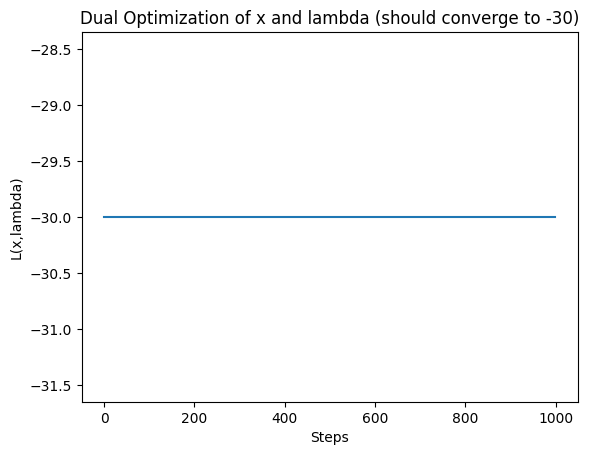

In [3]:
# Using Adam
# Initialize the parameters you want to optimize
x1_opt = torch.tensor(-5.0, requires_grad=False)
x2_opt = torch.tensor(-5.0, requires_grad=False)
x3_opt = torch.rand(1, requires_grad=True)
x4_opt = torch.rand(1, requires_grad=True)
print(f"x1: {x1_opt} is leaf {x1_opt.is_leaf}, x2: {x2_opt} is leaf {x2_opt.is_leaf}, x3: {x3_opt} is leaf {x3_opt.is_leaf}, x4: {x4_opt} is leaf {x4_opt.is_leaf}")

# Define the objective function
def objective_function(x1, x2, x3, x4):
    return 2*x1 + 4*x2 + x3*(-x1 - 5) + x4*(-x2 - 5)

# Number of optimization steps
num_steps = 1000
lr = 0.1

loss_graph = np.array([i for i in range(num_steps)])
loss_graph = np.vstack((loss_graph, np.zeros(num_steps)))

opt = torch.optim.Adam([x3_opt, x4_opt], lr=lr, maximize=True)
scheduler = torch.optim.lr_scheduler.ExponentialLR(opt, 0.98)

# Optimization loop
for step in range(num_steps):

    # Compute the objective function
    y = objective_function(x1_opt, x2_opt, x3_opt, x4_opt).sum()
    loss_graph[1, step] = y.item()

    opt.zero_grad(set_to_none=True)

    y.backward()

    opt.step()

    # clip lagrange values
    x3_opt.data = torch.clip(x3_opt.data, 0)
    x4_opt.data = torch.clip(x4_opt.data, 0)

    scheduler.step()

# The optimized values for x3 and x4
x1_optimized = x1_opt.item()
x2_optimized = x2_opt.item()
x3_optimized = x3_opt.item()
x4_optimized = x4_opt.item()

print("Optimized x1:", x1_optimized)
print("Optimized x2:", x2_optimized)
print("Optimized x3:", x3_optimized)
print("Optimized x4:", x4_optimized)

fig = plt.figure()
plt.title("Dual Optimization of x and lambda (should converge to -30)")
plt.xlabel("Steps")
plt.ylabel("L(x,lambda)")
plt.plot(loss_graph[0,:], loss_graph[1,:])

x1: tensor([0.6116], dtype=torch.float64, requires_grad=True) is leaf True, x2: tensor([0.0295], dtype=torch.float64, requires_grad=True) is leaf True, x3: tensor([0.1955], dtype=torch.float64, requires_grad=True) is leaf True, x4: tensor([0.9048], dtype=torch.float64, requires_grad=True) is leaf True
Optimized x1: -4.55081800782109
Optimized x2: -5.225714517952417
Optimized x3: 0.0
Optimized x4: 0.29730698177256015


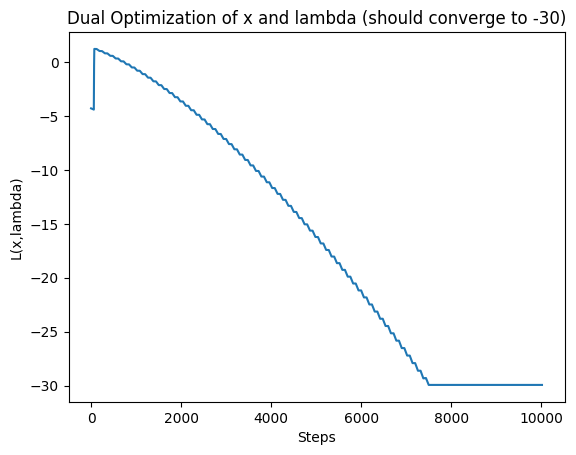

In [29]:
# Using Adam
# Initialize the parameters you want to optimize
x1_opt = torch.rand(1,dtype=torch.float64, requires_grad=True)
x2_opt = torch.rand(1,dtype=torch.float64, requires_grad=True)
x3_opt = torch.rand(1,dtype=torch.float64, requires_grad=True)
x4_opt = torch.rand(1,dtype=torch.float64, requires_grad=True)
print(f"x1: {x1_opt} is leaf {x1_opt.is_leaf}, x2: {x2_opt} is leaf {x2_opt.is_leaf}, x3: {x3_opt} is leaf {x3_opt.is_leaf}, x4: {x4_opt} is leaf {x4_opt.is_leaf}")

# Define the objective function
def objective_function(x1, x2, x3, x4):
    return 2*x1 + 4*x2 + x3*(-x1 - 5) + x4*(-x2 - 5)

# Number of optimization steps
num_steps = 10000 + 20
lr = 0.1

flip = True

loss_graph = np.array([i for i in range(num_steps)])
loss_graph = np.vstack((loss_graph, np.zeros(num_steps)))

opt_duals = torch.optim.Adam([x3_opt, x4_opt], lr=lr, maximize=True)
opt_x = torch.optim.Adadelta([x1_opt, x2_opt], lr=lr, maximize=False)
scheduler_dual = torch.optim.lr_scheduler.ExponentialLR(opt_duals, 0.98)
scheduler_x = torch.optim.lr_scheduler.ExponentialLR(opt_x, 0.98)

# Optimization loop
for step in range(num_steps):

    # Compute the objective function
    y = objective_function(x1_opt, x2_opt, x3_opt, x4_opt).sum()
    loss_graph[1, step] = y.item()

    opt_x.zero_grad(set_to_none=True)
    opt_duals.zero_grad(set_to_none=True)
    y.backward()

    if flip:
        opt_x.step()
        # if step % 20 == 0:
        #     scheduler_x.step()
    else:
        opt_duals.step()
        # if step % 20 == 0:
        #     scheduler_dual.step()
    
    # clip lagrange values
    x3_opt.data = torch.clip(x3_opt.data, 0)
    x4_opt.data = torch.clip(x4_opt.data, 0)

    if step != 0 and step % 60 == 0:
        flip = not flip
    
    if loss_graph[1, step] < -29.5 and loss_graph[1,step] > -30.5 and flip == False:
        loss_graph[1, step:] = loss_graph[1,step]
        break

# The optimized values for x3 and x4
x1_optimized = x1_opt.item()
x2_optimized = x2_opt.item()
x3_optimized = x3_opt.item()
x4_optimized = x4_opt.item()

print("Optimized x1:", x1_optimized)
print("Optimized x2:", x2_optimized)
print("Optimized x3:", x3_optimized)
print("Optimized x4:", x4_optimized)

fig = plt.figure()
plt.title("Dual Optimization of x and lambda (should converge to -30)")
plt.xlabel("Steps")
plt.ylabel("L(x,lambda)")
plt.plot(loss_graph[0,:], loss_graph[1,:])

x1: tensor([0.7194], requires_grad=True) is leaf True, x2: tensor([0.2687], requires_grad=True) is leaf True, x3: tensor([0.7701], requires_grad=True) is leaf True, x4: tensor([0.8334], requires_grad=True) is leaf True
Optimized x1: -4.999998092651367
Optimized x2: -4.999998092651367
Optimized x3: 1.9999995231628418
Optimized x4: 3.9999990463256836


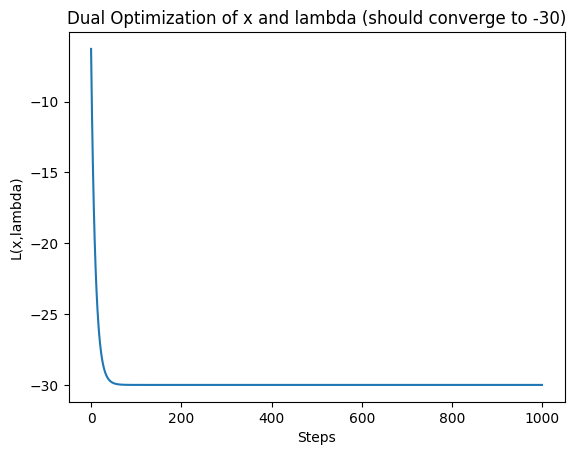

In [19]:
# Initialize the parameters you want to optimize
x1_opt = torch.rand(1, requires_grad=True)
x2_opt = torch.rand(1, requires_grad=True)
x3_opt = torch.rand(1, requires_grad=True)
x4_opt = torch.rand(1, requires_grad=True)
print(f"x1: {x1_opt} is leaf {x1_opt.is_leaf}, x2: {x2_opt} is leaf {x2_opt.is_leaf}, x3: {x3_opt} is leaf {x3_opt.is_leaf}, x4: {x4_opt} is leaf {x4_opt.is_leaf}")

# Define the objective function
def objective_function(x1, x2, x3, x4):
    return 2*x1 + 4*x2 + x3*(-x1 - 5) + x4*(-x2 - 5)

def zero_grad(parameters):
    for p in parameters:
        if p.grad is not None:
            p.grad.detach_()
            p.grad.zero_()

# Number of optimization steps
num_steps = 1000
lr = 0.1
flip = True

loss_graph = np.array([i for i in range(num_steps)])
loss_graph = np.vstack((loss_graph, np.zeros(num_steps)))

# Optimization loop
for step in range(num_steps):

    # Compute the objective function
    y = objective_function(x1_opt, x2_opt, x3_opt, x4_opt)
    y.backward()

    grad1 = x1_opt.grad if x1_opt.grad is not None else 0.0
    grad2 = x2_opt.grad if x2_opt.grad is not None else 0.0
    grad3 = x3_opt.grad if x3_opt.grad is not None else 0.0
    grad4 = x4_opt.grad if x4_opt.grad is not None else 0.0

    loss_graph[1, step] = y.item()
    
    if flip:
        # when this is true, we are minimizing L(x,lambda) w.r.t. x
        x1_opt.data = (x1_opt.data + lr*grad3).requires_grad_(True)
        x2_opt.data = (x2_opt.data + lr*grad4).requires_grad_(True)        

    else:
        # when this is false, we are maximizing L(x,lambda) w.r.t. lambda
        x3_opt.data = torch.clamp(x3_opt.data + lr*grad1, min=0.0).requires_grad_(True)
        x4_opt.data = torch.clamp(x4_opt.data + lr*grad2, min=0.0).requires_grad_(True)

    # if step != 0 and (step % 100) == 0:
    #     print(f"Step {step}, Loss: {y.item():.4f}, x1: {x1_opt.detach().numpy()[0]:.4f} x2: {x2_opt.detach().numpy()[0]:.4f} lambda_1: {x3_opt.detach().numpy()[0]:.4f}, lambda_2: {x4_opt.detach().numpy()[0]:.4f}, grads: [{x1_opt.grad.detach().numpy()[0]:.4f}, {x2_opt.grad.detach().numpy()[0]:.4f}, {x3_opt.grad.detach().numpy()[0]:.4f}, {x4_opt.grad.detach().numpy()[0]:.4f}]")

    if step != 0 and (step % 100) == 0:
        flip = not flip
        
    # zero out the gradients
    zero_grad([x1_opt, x2_opt, x3_opt, x4_opt])

# The optimized values for x3 and x4
x1_optimized = x1_opt.item()
x2_optimized = x2_opt.item()
x3_optimized = x3_opt.item()
x4_optimized = x4_opt.item()

print("Optimized x1:", x1_optimized)
print("Optimized x2:", x2_optimized)
print("Optimized x3:", x3_optimized)
print("Optimized x4:", x4_optimized)

fig = plt.figure()
plt.title("Dual Optimization of x and lambda (should converge to -30)")
plt.xlabel("Steps")
plt.ylabel("L(x,lambda)")
plt.plot(loss_graph[0,:], loss_graph[1,:])

Optimized x1: -0.8333324193954468
Optimized x2: -0.8333352208137512
Optimized l1: 1.045896053314209
Optimized l2: 0.2871112823486328
Optimized l3: 0.0
Optimized l4: 1.4137334823608398
Optimized l5: 0.5862621068954468


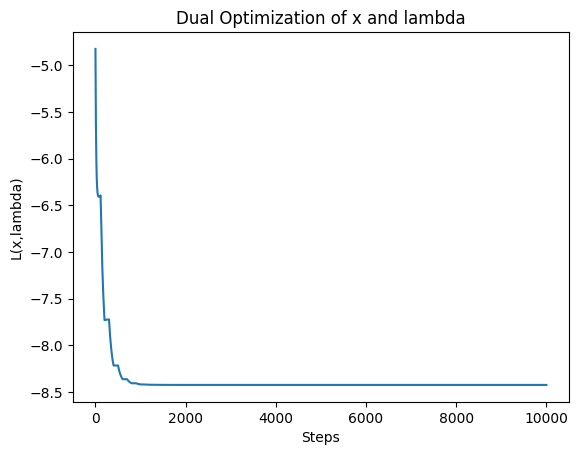

In [51]:
# Initialize the parameters you want to optimize
x1_opt = torch.rand(1, requires_grad=True)
x2_opt = torch.rand(1, requires_grad=True)
l1_opt = torch.rand(1, requires_grad=True)
l2_opt = torch.rand(1, requires_grad=True)
l3_opt = torch.rand(1, requires_grad=True)
l4_opt = torch.rand(1, requires_grad=True)
l5_opt = torch.rand(1, requires_grad=True)

# Define the objective function
def objective_function(x1, x2, l1, l2, l3, l4, l5):
    return x1 + 2*x2 + l1*(x1-2) + l2*(-x1-2) + l3*(x2-2) + l4*(-x2-2) + l5*(-3*x1 - x2 - 5)

def zero_grad(parameters):
    for p in parameters:
        if p.grad is not None:
            p.grad.detach_()
            p.grad.zero_()

# Number of optimization steps
num_steps = 10000
lr = 0.01
flip = True

loss_graph = np.array([i for i in range(num_steps)])
loss_graph = np.vstack((loss_graph, np.zeros(num_steps)))

# Optimization loop
for step in range(num_steps):

    # Compute the objective function
    y = objective_function(x1_opt, x2_opt, l1_opt, l2_opt, l3_opt, l4_opt, l5_opt)
    y.backward()

    x_grad1 = x1_opt.grad if x1_opt.grad is not None else 0.0
    x_grad2 = x2_opt.grad if x2_opt.grad is not None else 0.0
    l_grad1 = l1_opt.grad if l1_opt.grad is not None else 0.0
    l_grad2 = l2_opt.grad if l2_opt.grad is not None else 0.0
    l_grad3 = l3_opt.grad if l3_opt.grad is not None else 0.0
    l_grad4 = l4_opt.grad if l4_opt.grad is not None else 0.0
    l_grad5 = l5_opt.grad if l5_opt.grad is not None else 0.0

    loss_graph[1, step] = y.item()
    
    if flip:
        # when this is true, we are minimizing L(x,lambda) w.r.t. x
        x1_opt.data = (x1_opt.data + lr*(-l_grad1 + l_grad2 + l_grad5)).requires_grad_(True)
        x2_opt.data = (x2_opt.data + lr*(-l_grad3 + l_grad4 + l_grad5)).requires_grad_(True)        

    else:
        # when this is false, we are maximizing L(x,lambda) w.r.t. lambda
        l1_opt.data = torch.clamp(l1_opt.data + lr*(-x_grad1), min=0.0).requires_grad_(True)
        l2_opt.data = torch.clamp(l2_opt.data + lr*(x_grad1), min=0.0).requires_grad_(True)
        l3_opt.data = torch.clamp(l3_opt.data + lr*(-x_grad2), min=0.0).requires_grad_(True)
        l4_opt.data = torch.clamp(l4_opt.data + lr*(x_grad2), min=0.0).requires_grad_(True)
        l5_opt.data = torch.clamp(l5_opt.data + lr*(x_grad1 + x_grad2), min=0.0).requires_grad_(True)

    if step != 0 and (step % 100) == 0:
        flip = not flip
        
    # zero out the gradients
    zero_grad([x1_opt, x2_opt, l1_opt, l2_opt, l3_opt, l4_opt, l5_opt])

# The optimized values for x3 and x4
x1_optimized = x1_opt.item()
x2_optimized = x2_opt.item()
l1_optimized = l1_opt.item()
l2_optimized = l2_opt.item()
l3_optimized = l3_opt.item()
l4_optimized = l4_opt.item()
l5_optimized = l5_opt.item()

print("Optimized x1:", x1_optimized)
print("Optimized x2:", x2_optimized)
print("Optimized l1:", l1_optimized)
print("Optimized l2:", l2_optimized)
print("Optimized l3:", l3_optimized)
print("Optimized l4:", l4_optimized)
print("Optimized l5:", l5_optimized)

fig = plt.figure()
plt.title("Dual Optimization of x and lambda")
plt.xlabel("Steps")
plt.ylabel("L(x,lambda)")
plt.plot(loss_graph[0,:], loss_graph[1,:])

Below I am checking the results of the Lagrange problem above by computing the upper and lower bounds on x as well as the minimal and maximal pertubation on each logit output

In [54]:
W_ub = np.array([[4,3],[4,3]])
b_ub = np.array([2,2])
W_lb = np.array([[1,2],[1,1]])
# b_lb = np.array([1,1])
b_lb = np.zeros(2)
# using Gurobi to solve the same problem as above
opt_mod = Model(name = "simple_linear_program_2")

# add variables
inputs = np.array(list(opt_mod.addVars(W_ub.shape[1], name="x", lb=float("-inf"), ub=float("inf")).values()))

# adding the constraints
c1 = opt_mod.addConstr(inputs[0] - 2 <= 0, name='c1') # these four constraints are the l_inf norm box constraints
c2 = opt_mod.addConstr(-inputs[0] - 2 <= 0, name='c2')
c3 = opt_mod.addConstr(inputs[1] - 2 <= 0, name='c3')
c4 = opt_mod.addConstr(-inputs[1] - 2 <= 0, name='c4')
c5 = opt_mod.addConstr(-3*inputs[0] - inputs[1] - 5 <= 0, name='c5') # this constraint is a line constraint cutting through the box

worst_case_inputs_ub = []
worst_case_inputs_lb = []
upper_bounds = []
lower_bounds = []

# set the objective function for each logit
for idx in range(2*W_ub.shape[0]):
    i = idx // 2
    if idx % 2 == 0:
        obj_fn = quicksum([W_ub[i,j]*inputs[j] for j in range(W_ub.shape[1])]) + b_ub[i]
        opt_mod.setObjective(obj_fn, GRB.MAXIMIZE)
    else:
        obj_fn = quicksum([W_lb[i,j]*inputs[j] for j in range(W_lb.shape[1])]) + b_lb[i]
        opt_mod.setObjective(obj_fn, GRB.MINIMIZE)

    # now optimize the problem and save it to a file
    opt_mod.optimize()
    # opt_mod.write("scenario_one_upperbound_logit_one.lp")

    # output the result
    # print('Objective Function Value: %f' % opt_mod.ObjVal)
    if idx % 2 == 0:
        upper_bounds.append(opt_mod.ObjVal)
    else:
        lower_bounds.append(opt_mod.ObjVal)
    # Get values of the decision variables
    temp_inputs = []
    for v in opt_mod.getVars():
        # print('%s: %g' % (v.VarName, v.x))
        temp_inputs.append(v.x)

    if idx % 2 == 0:
        worst_case_inputs_ub.append(tuple(temp_inputs)) # append the worst case input that caused this maximal pertubation
    else:
        worst_case_inputs_lb.append(tuple(temp_inputs)) # append the worst case input that caused this maximal pertubation
    
for i in range(W_ub.shape[0]):
    print(f"logit {i + 1} is bounded s.t. {lower_bounds[i]} <= z(x) <= {upper_bounds[i]} with lb pertubation {worst_case_inputs_lb[i]} and ub pertubation {worst_case_inputs_ub[i]}")

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: 12th Gen Intel(R) Core(TM) i7-12700H, instruction set [SSE2|AVX|AVX2]
Thread count: 20 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 5 rows, 2 columns and 6 nonzeros
Model fingerprint: 0xf5f961a3
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [3e+00, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 5e+00]
Presolve removed 5 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.600000000e+01
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: 12th Gen Intel(R) Core(TM) i7-12700H, instruction set [SSE2|AVX|AVX2]
Thread count: 20 physical cores, 20 logical processors, using up to 20 th

In [ ]:
import numpy as np
from scipy.optimize import linprog

# Primal linear program coefficients
c = np.array([2, 3])
A = np.array([[1, -1], [3, 1]])
b = np.array([1, 2])

# Solve the primal linear program
result_primal = linprog(c, A_ub=A, b_ub=b, method='highs')

# Display the primal result
print("Primal Result:")
print(result_primal)

# Dual linear program coefficients
c_dual = -b  # Coefficients are negated for maximization
A_dual = -A.T  # Transpose of A with negation
b_dual = c  # Dual variables corresponding to the inequality constraints

# Solve the dual linear program
result_dual = linprog(c_dual, A_ub=A_dual, b_ub=b_dual, method='highs')

# Display the dual result
print("\nDual Result:")
print(result_dual)


Primal Result:
       message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
       success: True
        status: 0
           fun: 0.0
             x: [ 0.000e+00  0.000e+00]
           nit: 0
         lower:  residual: [ 0.000e+00  0.000e+00]
                marginals: [ 2.000e+00  3.000e+00]
         upper:  residual: [       inf        inf]
                marginals: [ 0.000e+00  0.000e+00]
         eqlin:  residual: []
                marginals: []
       ineqlin:  residual: [ 1.000e+00  2.000e+00]
                marginals: [-0.000e+00 -0.000e+00]

Dual Result:
       message: The problem is unbounded. (HiGHS Status 10: model_status is Unbounded; primal_status is At upper bound)
       success: False
        status: 3
           fun: None
             x: None
           nit: 0
         lower:  residual: None
                marginals: None
         upper:  residual: None
                marginals: None
         eqlin:  residual: None
                marginals: N

In [ ]:
# potentially look into this for solving the lagrange dual, but it requires the gradients to be determined beforehand
from scipy.optimize import fsolve, fmin_l_bfgs_b

a = 1
nbtests = 5
minmu = 0
maxmu = 5

def lagrange(x, mu):
    return x**2 + mu * (np.exp(x) + x - a)

def lagrange_grad(x, mu):
    grad_x = 2*x + mu * (np.exp(x) + 1)
    grad_mu = np.exp(x) + x - a
    return grad_x, grad_mu

def dual(mu):
    x = fsolve(lambda x: lagrange_grad(x, mu)[0], x0=1)
    obj_val = lagrange(x, mu)
    grad = lagrange_grad(x, mu)[1]
    return -1.0*obj_val, -1.0*grad

pl = np.empty((nbtests, 2))
for i, nu in enumerate(np.linspace(minmu,maxmu,nbtests)):
    res = fmin_l_bfgs_b(dual, x0=nu, bounds=[(0,None)], factr=1e6)
    mu_opt = res[0]
    x_opt = fsolve(lambda x: lagrange_grad(x, mu_opt)[0], x0=1)
    pl[i] = [nu, *x_opt]
print(pl)

[[0.   0.  ]
 [1.25 0.  ]
 [2.5  0.  ]
 [3.75 0.  ]
 [5.   0.  ]]
